In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm

import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn import decomposition

In [8]:
# Crear nuestro datos Toy model

X1, Y1 = make_blobs(n_features = 10, n_samples=100, centers = 4, random_state=4, cluster_std=1)
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [9]:
matrix = X1

In [13]:
# Crear un dataframe con las características
df = pd.DataFrame(matrix, index=range(matrix.shape[0]), columns=range(matrix.shape[1]) )
print(len(df.columns))

10


In [14]:
# Agregar el target
df['y'] = Y1
print(len(df.columns))

11


In [17]:
df.rename(columns={0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8',8:'x9',9:'x10'}, inplace=True)
print(df.columns)

Index([u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9', u'x10',
       u'y'],
      dtype='object')


<IPython.core.display.Javascript object>


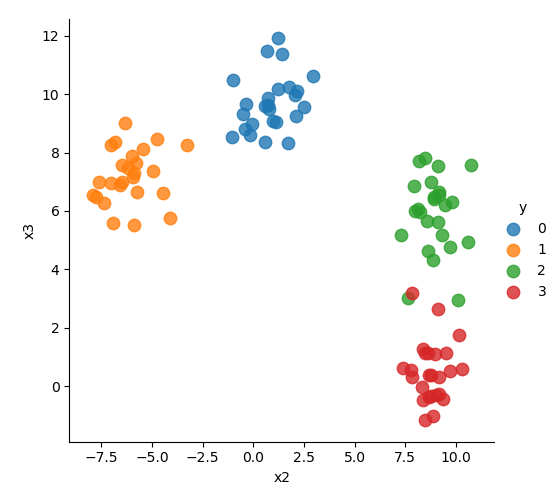

In [20]:
# Seleccionamos dos de las características.

sns.lmplot(x='x2', y='x3', data=df, fit_reg=False, hue='y', legend=True, scatter_kws={'s':80})

In [32]:
# Vamos a reducir la dimensionalidad del problema

pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)

In [33]:
df1 = pd.DataFrame( {'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4'] } )
print(df1)

    PC       var
0  PC1  0.445205
1  PC2  0.362620
2  PC3  0.169061
3  PC4  0.005475


<IPython.core.display.Javascript object>


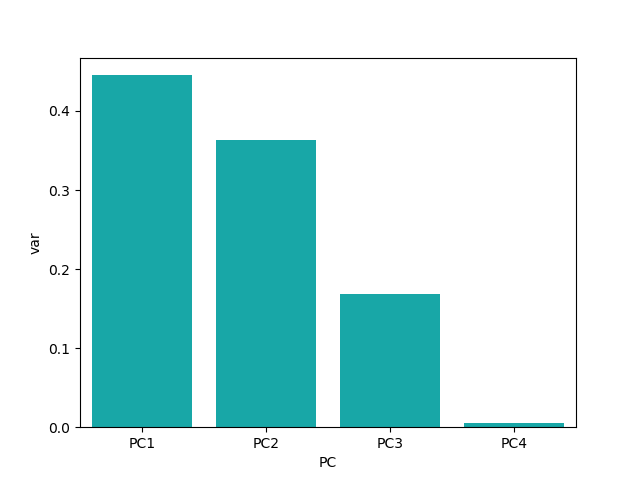

In [34]:
plt.figure()
sns.barplot(x='PC', y='var', data=df1, color='c')
plt.show()

In [37]:
pc_df = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4'])
pc_df['Cluster'] = Y1

#print(pc_df)

<IPython.core.display.Javascript object>


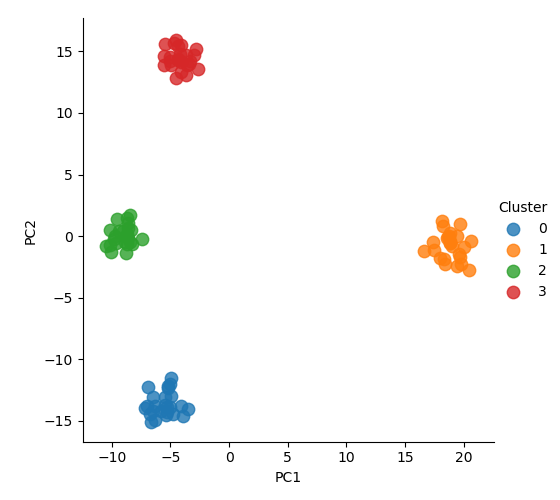

In [38]:
sns.lmplot(x='PC1', y='PC2', data=pc_df, fit_reg=False, hue='Cluster', legend=True, scatter_kws={'s':80})